In [1]:
import pandas as pd

# Load Titanic dataset from a public URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Fill missing age values with the mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [9]:
# Fill missing age values with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Fill missing 'Embarked' values with the most frequent port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column (too many missing values)
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

In [10]:
# Convert 'Sex' to numeric: male → 0, female → 1
df['Sex']=df['Sex'].map({'male':0,'female':1})
# Convert 'Embarked' to numeric: S → 0, C → 1, Q → 2
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

In [11]:
df['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
X=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df['Survived']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42
)

In [16]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [18]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

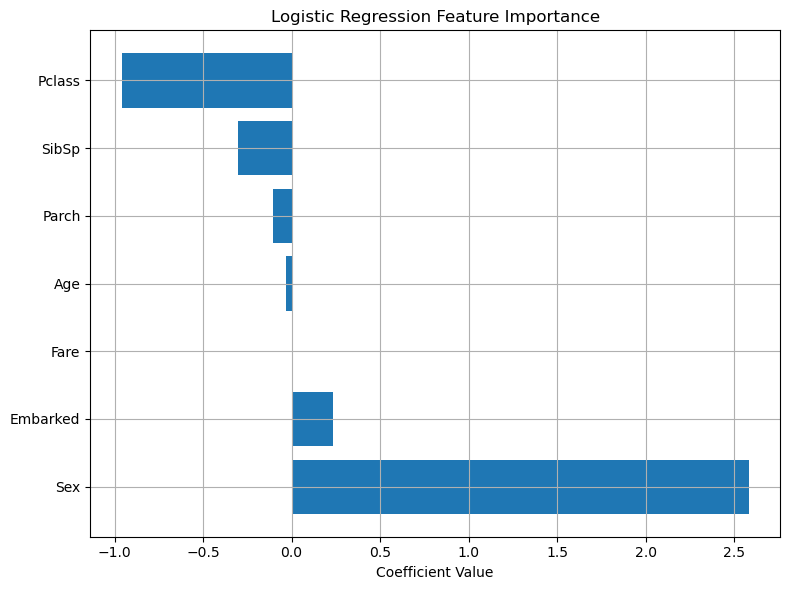

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

coefficients = model.coef_[0]
feature_names = X.columns

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Πλοτ
plt.figure(figsize=(8,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Logistic Regression Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()

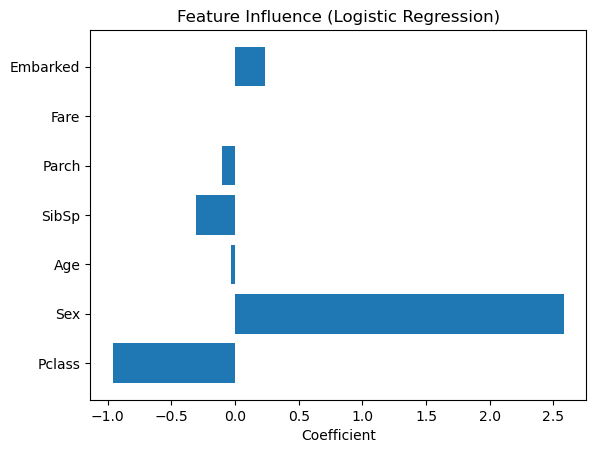

In [22]:
coefficients=model.coef_[0]
feature_names=X.columns
plt.barh(feature_names,coefficients)
plt.xlabel('Coefficient')
plt.title("Feature Influence (Logistic Regression)")
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [24]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



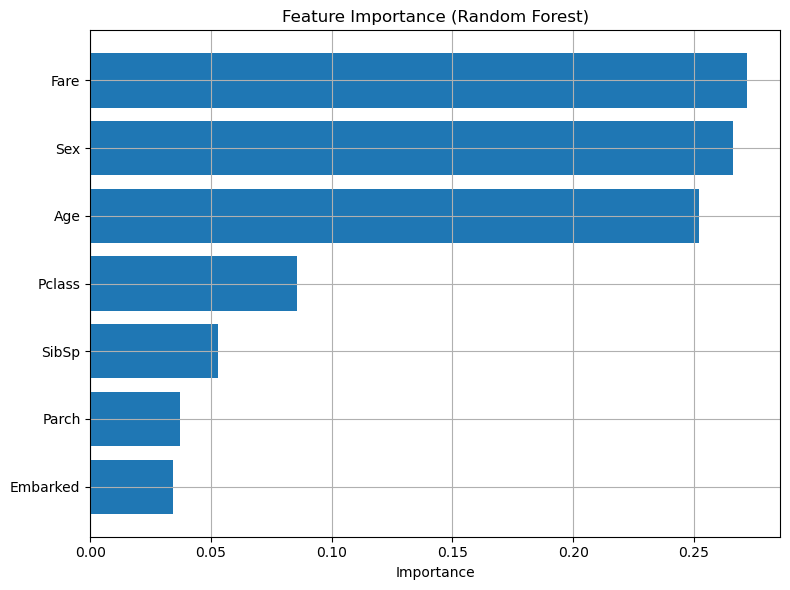

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
feature_names = X.columns

# DataFrame για ταξινόμηση
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8,6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.grid(True)
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]  # όχι 'auto'!
}
rf=RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                
    n_jobs=-1,           
    scoring='accuracy',
    verbose=2
)

In [35]:
grid_search.fit(X_train,y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8300206835418104


In [36]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.82      0.66      0.73        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.79       179



In [37]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    error_score='raise'  # Θα σου πετάξει error αμέσως αν κάτι πάει στραβά
)

In [39]:
clf = RandomForestClassifier(class_weight='balanced')

In [40]:
clf

RandomForestClassifier(class_weight='balanced')

In [41]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_leaf=2,
    min_samples_split=2,
    max_features=None,
    class_weight='balanced',  # Αυτό εδώ
    random_state=42
)

clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=None,
                       min_samples_leaf=2, random_state=42)

In [42]:
# Πάρε τις προβλέψεις ως πιθανότητες για κλάση 1 (κόκκινες μπάλες)
probs = clf.predict_proba(X_test)[:, 1]

# Όρισε νέο threshold πχ 0.3
threshold = 0.3

# Φτιάξε τις νέες προβλέψεις βάσει threshold
y_pred_new = (probs >= threshold).astype(int)

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       105
           1       0.71      0.89      0.79        74

    accuracy                           0.80       179
   macro avg       0.81      0.82      0.80       179
weighted avg       0.83      0.80      0.81       179

